In [1]:

HOMEPATH = "/home/ubuntu/fastai/"
DATA_HOME_DIR = HOMEPATH + "data/cifar-10/"
DATA_WORKING = DATA_HOME_DIR + "sample/"  #change this from + sample to DATA_HOME_DIR when production ready.
DATA_WORKING_RESULTS = DATA_WORKING + "results/"

print ("DATA_WORKING      :", DATA_WORKING)
print ("DATA_WORKING_RESULTS:", DATA_WORKING_RESULTS)

DATA_WORKING      : /home/ubuntu/fastai/data/cifar-10/sample/
DATA_WORKING_RESULTS: /home/ubuntu/fastai/data/cifar-10/sample/results/


In [2]:
#path = HOMEPATH + "data/dogscats/sample/"
path = DATA_HOME_DIR 
#path = DATA_HOME_DIR + "sample/"
train_path = path + 'train/'
test_path = path + 'test/'
testUnknown_path = path + 'test/unknown/'
valid_path = path + 'valid/'
model_path = path + 'models/'
sample_path = path + 'sample/'
sampleTrain_path = path + 'sample/train/'
sampleTest_path = path + 'sample/test/'
sampleValid_path = path + 'sample/valid/'
sampleResults_path = path + 'sample/results/'
sampleTestUnknown_path = path + 'sample/test/unknown/'

categories = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [25]:
DATA_WORKING_TEST = sampleTestUnknown_path    #testing version
#DATA_WORKING_TEST = testUnknown_path          #production version
SAMPLESUBMIT = "sampleSubmission.csv"

In [4]:
from keras.models import load_model
from keras.preprocessing import image, sequence


from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image, sequence
import os
import numpy as np
import pandas as pd
import PIL
from PIL import Image
import csv

import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5110)


In [5]:
os.chdir(DATA_HOME_DIR)
print ("os.getcwd:", os.getcwd())

os.getcwd: /home/ubuntu/fastai/data/cifar-10


In [6]:
sampleSubmit = pd.read_csv(DATA_HOME_DIR+SAMPLESUBMIT)

In [7]:
print (type(sampleSubmit), sampleSubmit.shape)

<class 'pandas.core.frame.DataFrame'> (300000, 2)


In [8]:
list(sampleSubmit)

['id', 'label']

In [9]:
sampleSubmit.label.unique()

array(['cat'], dtype=object)

In [10]:
def dirFileList(dir_path):
    return [name for name in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, name))]


In [11]:
print ("# of files in", testUnknown_path, ":", len(dirFileList(testUnknown_path)))#should be 300,000
print ("# of files in", sampleTestUnknown_path, ":", len(dirFileList(sampleTestUnknown_path)))#should be 60,000

# of files in /home/ubuntu/fastai/data/cifar-10/test/unknown/ : 300000
# of files in /home/ubuntu/fastai/data/cifar-10/sample/test/unknown/ : 60000


In [12]:
#test_file_list = len(dirFileList(testUnknown_path)) #swap to this when production ready.
test_file_list = len(dirFileList(sampleTestUnknown_path))

In [13]:
os.chdir("/home/ubuntu/fastai/fastai_bmt_reworking/Kaggle-CIFAR-10")
model = load_model('history3.h5')

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 224, 224, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 222, 222, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 111, 111, 64)      18496     
__________

In [22]:
dirList = [train_path, valid_path, sampleTrain_path, sampleValid_path]

for dir_path in dirList:
    for category in categories:
        print ("# of files in", dir_path+category, ":", len(dirFileList(dir_path+category)))

print ("# of files in", sampleTestUnknown_path, ":", len(dirFileList(sampleTestUnknown_path)))
print ("# of files in", testUnknown_path, ":", len(dirFileList(testUnknown_path)))

# of files in /home/ubuntu/fastai/data/cifar-10/train/airplane : 4200
# of files in /home/ubuntu/fastai/data/cifar-10/train/automobile : 4200
# of files in /home/ubuntu/fastai/data/cifar-10/train/bird : 4200
# of files in /home/ubuntu/fastai/data/cifar-10/train/cat : 4200
# of files in /home/ubuntu/fastai/data/cifar-10/train/deer : 4200
# of files in /home/ubuntu/fastai/data/cifar-10/train/dog : 4200
# of files in /home/ubuntu/fastai/data/cifar-10/train/frog : 4200
# of files in /home/ubuntu/fastai/data/cifar-10/train/horse : 4200
# of files in /home/ubuntu/fastai/data/cifar-10/train/ship : 4200
# of files in /home/ubuntu/fastai/data/cifar-10/train/truck : 4200
# of files in /home/ubuntu/fastai/data/cifar-10/valid/airplane : 800
# of files in /home/ubuntu/fastai/data/cifar-10/valid/automobile : 800
# of files in /home/ubuntu/fastai/data/cifar-10/valid/bird : 800
# of files in /home/ubuntu/fastai/data/cifar-10/valid/cat : 800
# of files in /home/ubuntu/fastai/data/cifar-10/valid/deer : 

In [ ]:
#can't use get_data method due to memory error. batch files individually through model.predict.
#track filenames against predictions and generate the submission file in correct format.

In [41]:
print (DATA_WORKING_TEST)
test_files = dirFileList(DATA_WORKING_TEST)
print ("len(test_files):", len(test_files))
print (test_files[0:10])

/home/ubuntu/fastai/data/cifar-10/sample/test/unknown/
len(test_files): 60000
['226519.png', '3374.png', '222277.png', '227652.png', '113097.png', '258178.png', '128852.png', '206670.png', '9481.png', '229126.png']


In [57]:
test_files_ints = []
count = 0
for file in test_files:
    #print (len(file))
    #print (int(file[:len(file)-4]))
    test_files_ints.append(int(file[:len(file)-4]))
    count += 1
    #if count==5: break
#print (test_files_ints)
test_files_ints.sort()
#print (test_files_ints)
test_files_sorted = []
for int_filename in test_files_ints:
    filename = str(int_filename)+".png"
    test_files_sorted.append(filename)
print (test_files_sorted[0:5])
print (len(test_files_sorted))

['24.png', '29.png', '31.png', '33.png', '38.png']
60000


In [34]:
def get_batches(dirname, gen=image.ImageDataGenerator(), shuffle=True, batch_size=4, class_mode='categorical',
                target_size=(224,224)):
    return gen.flow_from_directory(dirname, target_size=target_size,
            class_mode=class_mode, shuffle=shuffle, batch_size=batch_size)

In [35]:
def get_data(path, target_size=(224,224)):
    batches = get_batches(path, shuffle=False, batch_size=1, class_mode=None, target_size=target_size)
    return np.concatenate([batches.next() for i in range(batches.samples)])#nb: batches.samples required for python 3

In [37]:
print ("DATA_WORKING:", DATA_WORKING)
#nb: get_data is from utils.get_data
startTime= datetime.now()
print ("startTime:", startTime)

test_data = get_data(DATA_WORKING+'test')

print ("val_data:", type(val_data), val_data.shape)

timeElapsed=datetime.now()-startTime
print('val_data:Time elapsed (hh:mm:ss.ms) {}'.format(timeElapsed))

DATA_WORKING: /home/ubuntu/fastai/data/cifar-10/sample/
startTime: 2017-12-14 23:32:19.838566
Found 60000 images belonging to 1 classes.


MemoryError: 

In [ ]:
print(type(test_data))

/home/ubuntu/fastai/data/cifar-10/sample/test/unknown/24.png
<class 'numpy.ndarray'> (32, 32, 3)
(1, 32, 32, 3)
/home/ubuntu/fastai/data/cifar-10/sample/test/unknown/29.png
<class 'numpy.ndarray'> (32, 32, 3)
(1, 32, 32, 3)
/home/ubuntu/fastai/data/cifar-10/sample/test/unknown/31.png
<class 'numpy.ndarray'> (32, 32, 3)
(1, 32, 32, 3)
/home/ubuntu/fastai/data/cifar-10/sample/test/unknown/33.png
<class 'numpy.ndarray'> (32, 32, 3)
(1, 32, 32, 3)
/home/ubuntu/fastai/data/cifar-10/sample/test/unknown/38.png
<class 'numpy.ndarray'> (32, 32, 3)
(1, 32, 32, 3)


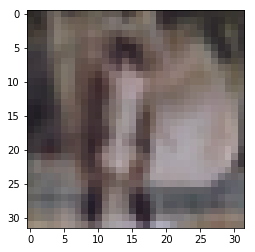

In [65]:
import matplotlib.image as mpimage

count = 0
for file in test_files_sorted:
    print (DATA_WORKING_TEST+file)
    im = mpimage.imread(DATA_WORKING_TEST+file)
    print (type(im), im.shape)
    print(np.reshape(im, (1,32,32,3)).shape)
    #print (np.unique(im))
    imgplot = plt.imshow(im)
    count += 1
    if count == 5: break

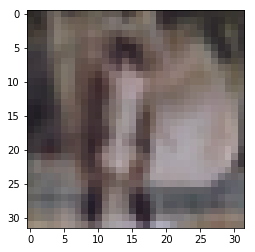

In [61]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/home/ubuntu/fastai/data/cifar-10/sample/test/unknown/24.png', 'r')
pil_im = Image.open('/home/ubuntu/fastai/data/cifar-10/sample/test/unknown/38.png', 'r')
imshow(np.asarray(pil_im))

In [ ]:
#as per above this is not needed. load method already does these conversions.
#NB: different load method loads files as arrays of ints with values 0 to 255.
#data loaded from images has integer values 0 to 255
#convert this to float values between 0.0 and 1.0
#trn_data = trn_data.astype('float32')
#trn_data /= 255


In [77]:
count = 0
for file in test_files_sorted:
    print (DATA_WORKING_TEST+file)
    im = mpimage.imread(DATA_WORKING_TEST+file)
    print (type(im), im.shape)
    #reshape array to suit requirements of model. (nb: 3 dimensions vs 4 dimensions expected)
    #model.predict(np.reshape(im, (32,32,3)))
    #im = np.reshape(im, (None,)+im.shape)
    model.predict(im)
    count += 1
    if count == 5: break

/home/ubuntu/fastai/data/cifar-10/sample/test/unknown/24.png
<class 'numpy.ndarray'> (32, 32, 3)


TypeError: 'NoneType' object cannot be interpreted as an integer